In [ ]:
import tensorflow as tf
pip install imutils
Import Required Libraries
from imutils import paths
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
imagePaths = list(paths.list_images("/content/drive/MyDrive/Main Dataset"))

In [ ]:
imagePaths

['/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_171/note_171_1.jpg',
 '/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_171/note_171_6.jpg',
 '/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_171/note_171_2.jpg',
 '/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_171/note_171_3.jpg',
 '/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_171/note_171_4.jpg',
 '/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_171/note_171_5.jpg',
 '/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_169/note_169_5.jpg',
 '/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_169/note_169_3.jpg',
 '/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_169/note_169_4.jpg',
 '/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_169/note_169_1.jpg',
 '/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_169/note_169_2.jpg',
 '/content/drive/MyDrive/Main Dataset/fake_notes/Note 500/note_169/note_169_

In [ ]:
import glob
from google.colab import drive

#Image preprocessing for Real Notes

Real_notes = list(paths.list_images("/content/drive/MyDrive/Main Dataset/real_notes"))

#Image processing function
def process_images(Real_notes,real_directory):
    if not os.path.exists(real_directory):
        os.makedirs(real_directory)

    for i, file in enumerate(Real_notes):

        image = cv2.imread(file) #Image load

        denoised_image = cv2.GaussianBlur(image, (5, 5), 0) #Apply Gaussian Blur to remove noise

        normalized_image = cv2.normalize(denoised_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) #Normalize the image

        #Image Augmentation include rotation, flipping and center crop

        for angle in range(-15, 16, 30):  #Rotating the image
            rotation_matrix = cv2.getRotationMatrix2D((normalized_image.shape[1] // 2, normalized_image.shape[0] // 2), angle, 1.0)
            rotated_image = cv2.warpAffine(normalized_image, rotation_matrix, (normalized_image.shape[1], normalized_image.shape[0]))

            save_path = os.path.join(real_directory, f"real_processed_{i}_rotated_{angle}.jpg")
            cv2.imwrite(save_path, rotated_image)
            print(f"Saved: {save_path}")

        #Flipping the image
        flipped_image = cv2.flip(normalized_image, 1)  #Flip horizontally
        save_path = os.path.join(real_directory, f"real_processed_{i}_flipped.jpg")
        cv2.imwrite(save_path, flipped_image)
        print(f"Saved: {save_path}")

        h, w = normalized_image.shape[:2]

        # Center Crop
        centerx, centery = w // 2, h // 2
        crop = (int(h * 0.8), int(w * 0.8))  #Crop to 80% of original size
        center_cropped_image = normalized_image[centery - crop[0] // 2:centery + crop[0] // 2,
                                                centerx - crop[1] // 2:centerx + crop[1] // 2]
        save_path = os.path.join(real_directory, f"real_processed_{i}_center_cropped.jpg")
        cv2.imwrite(save_path, center_cropped_image)
        print(f"Saved: {save_path}")

    print("Real Image processing completed!")


#Save the images in google drive after preprocessing
real_directory = '/content/drive/MyDrive/Main Dataset/Processed_image/Real_processed_images/'

process_images(Real_notes, real_directory)

In [ ]:
#Image preprocessing for Fake Notes

Fake_notes = list(paths.list_images("/content/drive/MyDrive/Main Dataset/fake_notes"))
def process_images(Fake_notes, fake_directory):
    if not os.path.exists(fake_directory):
        os.makedirs(fake_directory)

    for i, file in enumerate(Fake_notes):

        image = cv2.imread(file) #Image load

        denoised_image = cv2.GaussianBlur(image, (5, 5), 0) #Apply Gaussian Blur to remove noise

        normalized_image = cv2.normalize(denoised_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) #Normalize the image

        #Image Augmentation include rotation, flipping and center crop

        for angle in range(-15, 16, 30):  #Rotating the image
            rotation_matrix = cv2.getRotationMatrix2D((normalized_image.shape[1] // 2, normalized_image.shape[0] // 2), angle, 1.0)
            rotated_image = cv2.warpAffine(normalized_image, rotation_matrix, (normalized_image.shape[1], normalized_image.shape[0]))

            # Save rotated image in PNG format (high quality, no compression)
            save_path = os.path.join(fake_directory, f"fake_processed_{i}_rotated_{angle}.jpg")
            cv2.imwrite(save_path, rotated_image)
            print(f"Saved: {save_path}")

        #Flipping the image
        flipped_image = cv2.flip(normalized_image, 1)  #Flip horizontally
        save_path = os.path.join(fake_directory, f"fake_processed_{i}_flipped.jpg")
        cv2.imwrite(save_path, flipped_image)
        print(f"Saved: {save_path}")

        h, w = normalized_image.shape[:2]

        #Center Crop
        centerx, centery = w // 2, h // 2
        crop = (int(h * 0.8), int(w * 0.8))  #Crop to 80% of original size
        center_cropped_image = normalized_image[centery - crop[0] // 2:centery + crop[0] // 2,
                                                centerx - crop[1] // 2:centerx + crop[1] // 2]
        save_path = os.path.join(fake_directory, f"fake_processed_{i}_center_cropped.jpg")
        cv2.imwrite(save_path, center_cropped_image)
        print(f"Saved: {save_path}")

    print("Fake Image processing completed!")

fake_directory = '/content/drive/MyDrive/Main Dataset/Processed_image/fake_processed_images/'
process_images(Fake_notes, fake_directory)

In [ ]:
#Data Split started from here
import random
import shutil
from concurrent.futures import ThreadPoolExecutor

#Directories for the source paths containing real and fake note after image preprocessing
Real_directory = '/content/drive/MyDrive/Main Dataset/Processed_image/Real_processed_images'
Fake_directory = '/content/drive/MyDrive/Main Dataset/Processed_image/fake_processed_images'

#Directories for train, validation, and test
Data_split_directory = '/content/drive/MyDrive/Main Dataset/data_split/'

Train_directory = os.path.join(Data_split_directory, 'Train Data/')
Validation_directory = os.path.join(Data_split_directory, 'Validation Data/')
Test_directory = os.path.join(Data_split_directory, 'Test Data/')

#Create the directories if they don't exist
for dir in [Train_directory, Validation_directory, Test_directory]:
    os.makedirs(os.path.join(dir, 'real'), exist_ok=True)
    os.makedirs(os.path.join(dir, 'fake'), exist_ok=True)

real_notes = os.listdir(Real_directory)
fake_notes = os.listdir(Fake_directory)

#Shuffle the images to randomize the split
random.shuffle(real_notes)
random.shuffle(fake_notes)

#Data split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

#Number of images for each split
def split_data(images, train_ratio, validation_ratio):
    total_img = len(images)
    train_count = int(train_ratio * total_img)
    validation_count = int(validation_ratio * total_img)
    train_img = images[:train_count]
    validation_img = images[train_count:train_count + validation_count]
    test_img = images[train_count + validation_count:]
    return train_img, validation_img, test_img

#Split the real and fake notes
real_train, real_validation, real_test = split_data(real_notes, train_ratio, validation_ratio)
fake_train, fake_validation, fake_test = split_data(fake_notes, train_ratio, validation_ratio)

def move_images(image_list, source_dir, dest_dir, label):
    for img in image_list:
        shutil.move(os.path.join(source_dir, img), os.path.join(dest_dir, label, img))

#Use ThreadPoolExecutor to transfer files parallelly for improved efficiency.
with ThreadPoolExecutor(max_workers=4) as executor:
    # Move real notes
    executor.submit(move_images, real_train, Real_directory, Train_directory, 'real')
    executor.submit(move_images, real_validation, Real_directory, Validation_directory, 'real')
    executor.submit(move_images, real_test, Real_directory, Test_directory, 'real')

    #Move fake notes
    executor.submit(move_images, fake_train, Fake_directory, Train_directory, 'fake')
    executor.submit(move_images, fake_validation, Fake_directory, Validation_directory, 'fake')
    executor.submit(move_images, fake_test, Fake_directory, Test_directory, 'fake')

#Print the number of images in each split
print(f'Split data into:')
print(f' - Train Data: {len(real_train)} real, {len(fake_train)} fake images')
print(f' - Validation Data: {len(real_validation)} real, {len(fake_validation)} fake images')
print(f' - Test Data: {len(real_test)} real, {len(fake_test)} fake images')


In [ ]:
#Model train using mobilenet transfer learning started from here
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

train_directory = '/content/drive/MyDrive/Main Dataset/data_split/Train Data'
validation_directory = '/content/drive/MyDrive/Main Dataset/data_split/Validation Data'
test_directory = '/content/drive/MyDrive/Main Dataset/data_split/Test Data'

#Image size and batch size
image_size = (224, 224)
batch_size = 32

#Augmentation for training data required for model train
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

#Rescaling for validation and test data
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

#Load training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 6384 images belonging to 2 classes.
Found 1368 images belonging to 2 classes.
Found 1368 images belonging to 2 classes.


In [ ]:
#Load the MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

# Add new layers on MobileNet
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling reduces tensor to a vector
x = Dense(1024, activation='relu')(x)  # Dense layer
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer

# Creating the model
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stop]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 2546s 12s/step - accuracy: 0.8339 - loss: 0.3549 - val_accuracy: 0.9876 - val_loss: 0.0682
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1273s 6s/step - accuracy: 0.9727 - loss: 0.0941 - val_accuracy: 0.9920 - val_loss: 0.0429
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1218s 6s/step - accuracy: 0.9763 - loss: 0.0795 - val_accuracy: 0.9920 - val_loss: 0.0333
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1200s 6s/step - accuracy: 0.9800 - loss: 0.0614 - val_accuracy: 0.9949 - val_loss: 0.0254
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1193s 6s/step - accuracy: 0.9813 - loss: 0.0513 - val_accuracy: 0.9949 - val_loss: 0.0213
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1202s 6s/step - accuracy: 0.9878 - loss: 0.0404 - val_accuracy: 0.9949 - val_loss: 0.0198
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1176s 6s/step - accuracy: 0.9906 - loss: 0.0317 - val_accuracy: 0.9949 - val_loss: 0.0167
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1209s 6s/step - accuracy: 0.9894 - loss: 0.0345 - val_accura

In [ ]:
#Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc*100:.2f}%')

model.save('/content/drive/MyDrive/Main Dataset/models/mobilenet_transfer_learning_model_for_counterfeit_detection.h5')

43/43 ━━━━━━━━━━━━━━━━━━━━ 606s 14s/step - accuracy: 0.9936 - loss: 0.0175


Test accuracy: 99.42%


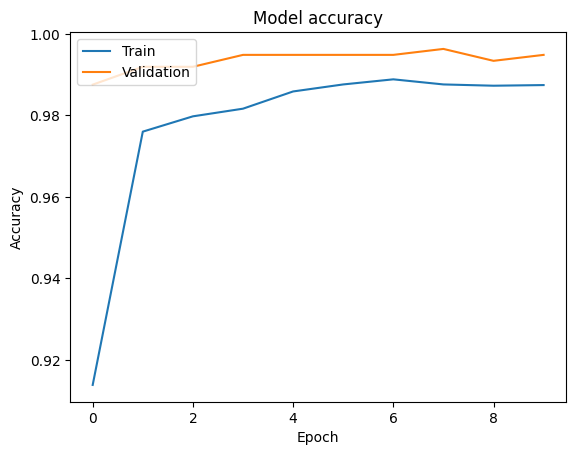

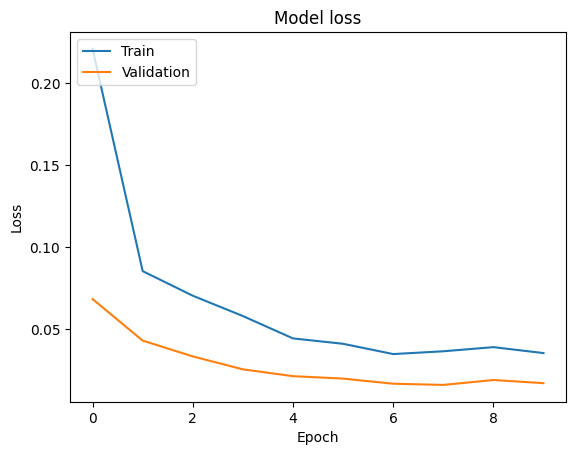

43/43 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step


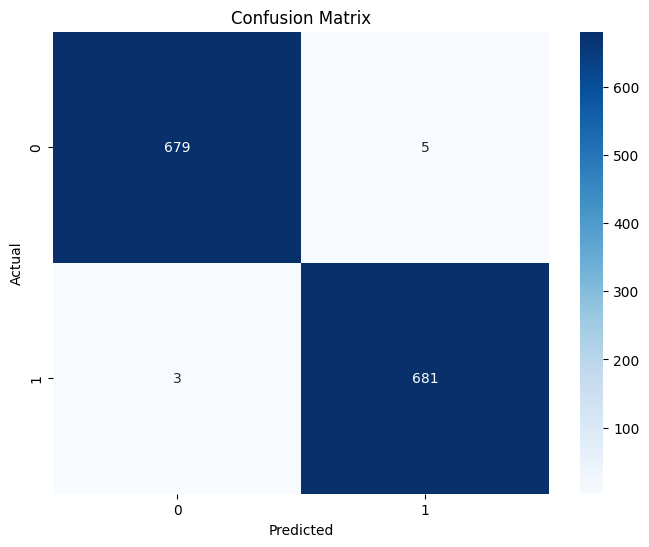

Precision: 0.99
Recall: 1.00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Added import for seaborn
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)


#Confusion matrix
con_matrix = confusion_matrix(y_true, y_pred)

#Confusion matrixtest set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

In [6]:
from tensorflow import keras

# Load the saved model
model = load_model('/content/drive/MyDrive/Main Dataset/models/mobilenet_transfer_learning_model_for_counterfeit_detection.h5')
# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,280,516 (16.33 MB)

 Trainable params: 1,051,650 (4.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
#Testing the model after model train using images from our dataset
from tensorflow.keras.preprocessing import image
def preprocess_image(image_path, target_size=(224, 224)):
    image = image.load_img(image_path, target_size=target_size)
    image_array = image.img_to_array(image)
    image_array = np.expand_dims(img_array, axis=0)
    image_array /= 255.0
    return image_array

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Main Dataset/models/mobilenet_transfer_learning_model_for_counterfeit_detection.h5')

def predict_banknote(image_path):
    image = preprocess_image(image_path)
    prediction = model.predict(image)

    #[0] = 'fake', [1] = 'real'
    if prediction[0][1] > 0.5:
        print("The banknote is real.")
    else:
        print("The banknote is fake.")

predict_banknote('/content/drive/MyDrive/Main Dataset/All real 500 check/IMG_0612.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
The banknote is fake.


In [ ]:
#Load .h5 model
keras_model_path = '/content/drive/MyDrive/Main Dataset/models/mobilenet_transfer_learning_model_for_counterfeit_detection.h5'
model = tf.keras.models.load_model(keras_model_path)

#Convert the model to TFLite to connect with website
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

#Save the TFLite model
tflite_model_path = '/content/drive/MyDrive/Main Dataset/TFlite Model/mobilenet_transfer_learning_model_for_counterfeit_detection_quantized.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpg22qgtyv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  134011878396976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134011878407184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134011878540384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134011878402608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134011878404896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134011878399792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134011878539504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134011878542672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134011878542144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134011878543024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134011878545136